In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16  # Using VGG16 as an example
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-08-09 11:29:27.820295: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 11:29:27.857902: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 11:29:28.048952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 11:29:28.049043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 11:29:28.080851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 5s 0us/step


In [4]:
base_model.trainable = False

In [5]:
model = Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 [==============================] - 39s 49ms/step - loss: 1.4133 - accuracy: 0.5106 - val_loss: 1.2924 - val_accuracy: 0.5489
Epoch 2/10
782/782 [==============================] - 42s 54ms/step - loss: 1.2115 - accuracy: 0.5793 - val_loss: 1.2247 - val_accuracy: 0.5703
Epoch 3/10
782/782 [==============================] - 48s 62ms/step - loss: 1.1556 - accuracy: 0.5976 - val_loss: 1.1961 - val_accuracy: 0.5788
Epoch 4/10
782/782 [==============================] - 50s 64ms/step - loss: 1.1218 - accuracy: 0.6098 - val_loss: 1.1626 - val_accuracy: 0.5944
Epoch 5/10
782/782 [==============================] - 50s 64ms/step - loss: 1.0934 - accuracy: 0.6181 - val_loss: 1.1434 - val_accuracy: 0.6004
Epoch 6/10
782/782 [==============================] - 50s 64ms/step - loss: 1.0655 - accuracy: 0.6283 - val_loss: 1.1425 - val_accuracy: 0.5987
Epoch 7/10
782/782 [==============================] - 50s 64ms/step - loss: 1.0444 - accuracy: 0.6336 - val_loss: 1.1457 - val_accuracy:

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 8s - loss: 1.1251 - accuracy: 0.6066 - 8s/epoch - 27ms/step
Test accuracy: 0.6065999865531921


In [8]:
base_model.trainable = True

# Fine-tune from a specific layer onward
fine_tune_at = 15
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(x_train, y_train, epochs=10,
                         validation_data=(x_test, y_test),
                         batch_size=64)

Epoch 1/10
782/782 [==============================] - 124s 159ms/step - loss: 0.9848 - accuracy: 0.6554 - val_loss: 0.8707 - val_accuracy: 0.6957
Epoch 2/10
782/782 [==============================] - 126s 161ms/step - loss: 0.7314 - accuracy: 0.7421 - val_loss: 0.8000 - val_accuracy: 0.7201
Epoch 3/10
782/782 [==============================] - 130s 166ms/step - loss: 0.5907 - accuracy: 0.7881 - val_loss: 0.8197 - val_accuracy: 0.7240
Epoch 4/10
782/782 [==============================] - 133s 170ms/step - loss: 0.4668 - accuracy: 0.8337 - val_loss: 0.8168 - val_accuracy: 0.7301
Epoch 5/10
782/782 [==============================] - 132s 169ms/step - loss: 0.3700 - accuracy: 0.8672 - val_loss: 0.8499 - val_accuracy: 0.7357
Epoch 6/10
782/782 [==============================] - 133s 170ms/step - loss: 0.2725 - accuracy: 0.9014 - val_loss: 0.8987 - val_accuracy: 0.7374
Epoch 7/10
782/782 [==============================] - 134s 171ms/step - loss: 0.1967 - accuracy: 0.9317 - val_loss: 1.0433 -

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy after fine-tuning: {test_acc}")

313/313 - 9s - loss: 1.1851 - accuracy: 0.7422 - 9s/epoch - 28ms/step
Test accuracy after fine-tuning: 0.7422000169754028


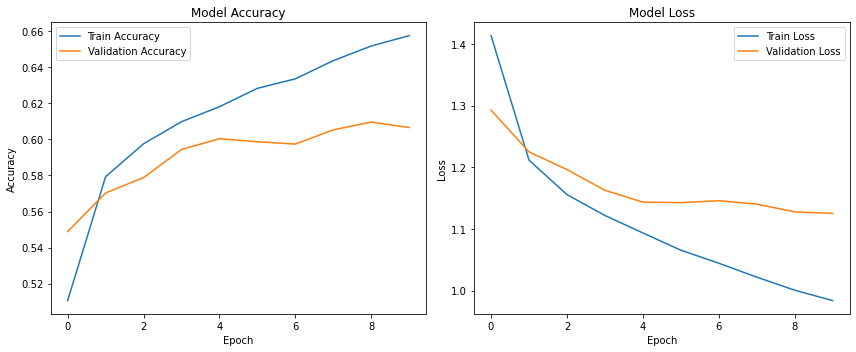

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
